In [2]:
import os
import sys
import pandas as pd
PROJECT_PATH = os.path.join(os.path.abspath('.').split('terminalC')[0], 'terminalC')
DATA_PATH = os.path.join(PROJECT_PATH, 'data', 'raw_data')
DATA_PROCESSED_PATH = os.path.join(PROJECT_PATH, 'data', 'processed')

sys.path.append(PROJECT_PATH)

In [3]:
# 1-2. OHLCV + indicator table
asset_id_hashmap = {
    'btc': 1, 'eth': 2, 'xrp': 3, 'sol': 4, 'doge': 5, 'ada': 6, 'link': 7,
    'avax': 8, 'xlm': 9, 'hbar': 10, 'apt': 11, 'ondo': 12, 'sui': 13
}
candle_df = pd.read_pickle(os.path.join(DATA_PROCESSED_PATH, 'final_candle.pickle'))
candle_df

,asset_id,coin,timeframe,ts,open,high,low,close,volume,rsi,...,ema_50,sma_100,ema_100,sma_200,ema_200,peak_high_high,peak_high_close,peak_low_low,peak_low_close,ts_int
0,6,ADA,4h,2024-10-01 00:00:00+00:00,0.3733,0.3823,0.3710,0.3820,9699123.70,33.788396,...,0.384692,0.366160,0.373196,0.352760,0.361938,False,False,False,False,1727740800000
1,6,ADA,4h,2024-10-01 04:00:00+00:00,0.3819,0.3857,0.3805,0.3841,8814774.60,36.318408,...,0.384669,0.366455,0.373412,0.352929,0.362158,False,False,False,False,1727755200000
2,6,ADA,4h,2024-10-01 08:00:00+00:00,0.3840,0.3860,0.3823,0.3843,7236836.90,36.710963,...,0.384655,0.366770,0.373627,0.353075,0.362379,False,False,False,False,1727769600000
3,6,ADA,4h,2024-10-01 12:00:00+00:00,0.3844,0.3853,0.3552,0.3664,41853504.20,30.694444,...,0.383939,0.366895,0.373484,0.353116,0.362419,False,False,False,False,1727784000000
4,6,ADA,4h,2024-10-01 16:00:00+00:00,0.3665,0.3680,0.3424,0.3532,50657717.70,23.236010,...,0.382733,0.366884,0.373082,0.353079,0.362327,False,False,False,False,1727798400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108666,8,AVAX,30m,2025-10-01 01:00:00+00:00,30.0000,30.1200,29.9400,30.0900,66066.61,69.565217,...,29.700042,29.797700,29.626963,29.235400,29.674212,False,False,False,False,1759280400000
2108667,8,AVAX,30m,2025-10-01 01:30:00+00:00,30.0900,30.2400,29.9900,30.1900,73790.75,68.181818,...,29.719256,29.799500,29.638112,29.242800,29.679344,False,False,False,False,1759282200000
2108668,8,AVAX,30m,2025-10-01 02:00:00+00:00,30.2000,30.2100,29.9500,30.0100,48071.64,58.673469,...,29.730658,29.798100,29.645477,29.248150,29.682634,False,False,False,False,1759284000000
2108669,8,AVAX,30m,2025-10-01 02:30:00+00:00,30.0100,30.0200,29.8900,29.9300,34659.24,47.647059,...,29.738475,29.797700,29.651111,29.253450,29.685095,False,False,False,False,1759285800000


In [4]:
candle_df['asset_id'] = candle_df['coin'].apply(lambda x: asset_id_hashmap[x.lower()])
candle_df

,asset_id,coin,timeframe,ts,open,high,low,close,volume,rsi,...,ema_50,sma_100,ema_100,sma_200,ema_200,peak_high_high,peak_high_close,peak_low_low,peak_low_close,ts_int
0,6,ADA,4h,2024-10-01 00:00:00+00:00,0.3733,0.3823,0.3710,0.3820,9699123.70,33.788396,...,0.384692,0.366160,0.373196,0.352760,0.361938,False,False,False,False,1727740800000
1,6,ADA,4h,2024-10-01 04:00:00+00:00,0.3819,0.3857,0.3805,0.3841,8814774.60,36.318408,...,0.384669,0.366455,0.373412,0.352929,0.362158,False,False,False,False,1727755200000
2,6,ADA,4h,2024-10-01 08:00:00+00:00,0.3840,0.3860,0.3823,0.3843,7236836.90,36.710963,...,0.384655,0.366770,0.373627,0.353075,0.362379,False,False,False,False,1727769600000
3,6,ADA,4h,2024-10-01 12:00:00+00:00,0.3844,0.3853,0.3552,0.3664,41853504.20,30.694444,...,0.383939,0.366895,0.373484,0.353116,0.362419,False,False,False,False,1727784000000
4,6,ADA,4h,2024-10-01 16:00:00+00:00,0.3665,0.3680,0.3424,0.3532,50657717.70,23.236010,...,0.382733,0.366884,0.373082,0.353079,0.362327,False,False,False,False,1727798400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108666,8,AVAX,30m,2025-10-01 01:00:00+00:00,30.0000,30.1200,29.9400,30.0900,66066.61,69.565217,...,29.700042,29.797700,29.626963,29.235400,29.674212,False,False,False,False,1759280400000
2108667,8,AVAX,30m,2025-10-01 01:30:00+00:00,30.0900,30.2400,29.9900,30.1900,73790.75,68.181818,...,29.719256,29.799500,29.638112,29.242800,29.679344,False,False,False,False,1759282200000
2108668,8,AVAX,30m,2025-10-01 02:00:00+00:00,30.2000,30.2100,29.9500,30.0100,48071.64,58.673469,...,29.730658,29.798100,29.645477,29.248150,29.682634,False,False,False,False,1759284000000
2108669,8,AVAX,30m,2025-10-01 02:30:00+00:00,30.0100,30.0200,29.8900,29.9300,34659.24,47.647059,...,29.738475,29.797700,29.651111,29.253450,29.685095,False,False,False,False,1759285800000


In [ ]:
divergence_df = pd.read_pickle(os.path.join(DATA_PROCESSED_PATH, 'final_divergence.pickle'))
divergence_df.head(4)

,asset_id,timeframe,start_datetime,end_datetime,entry_datetime,entry_price,previous_peak_datetime,divergence,price_change,rsi_change,strength_score
0,1,1d,70,75,77,72344.75,59,Bearish Divergence,-3960.43,-21.074422,1.00000
1,1,1d,124,159,161,103706.66,81,Bearish Divergence,-3523.82,-1.588700,0.26991
2,1,1d,197,213,215,84010.02,168,Bullish Divergence,1514.26,11.317172,1.00000
3,1,1d,197,236,238,82615.22,168,Bullish Divergence,7437.58,27.905868,1.00000


In [13]:
indi_df = pd.read_pickle(os.path.join(DATA_PROCESSED_PATH, 'final_indicator_rules.pickle'))
indi_df

,indicator_key,indicator_name,description,required_columns,timeframes
0,rsi_14,RSI (14),Standard RSI oversold (<30) / overbought (>70)...,rsi,all
1,stoch_d_9_6,"Stochastic %D (9,6)",Stochastic oscillator slow line thresholds 20/80.,stoch_d_9_6,all
2,stoch_rsi_14,Stochastic RSI (14),Stochastic RSI highlighting RSI-based extremes.,stoch_rsi_14,all
3,macd_hist,"MACD Histogram (12,26,9)",MACD histogram sign captures directional momen...,macd_hist,all
4,ema12_vs_ema26,EMA 12/26 Crossover,Positive spread (EMA12 > EMA26) signals bullis...,"ema_12,ema_26",all
5,adx_14,ADX (14),ADX with DI comparison identifies strong bulli...,"adx_14,plus_di_14,minus_di_14",all
6,atr_14,ATR (14),Average True Range relative to price flags vol...,"atr_14,close",all
7,willr_14,Williams %R (14),"Overbought above -20 (Sell), oversold below -8...",willr,all
8,cci_14,CCI (14),Commodity Channel Index ±100 extremes signal m...,cci_14,all
9,highs_lows_14,Highs/Lows (14),Position of close within 14-period range for b...,"highs_lows_14,close",all


In [10]:
ind_sig_df = pd.read_pickle(os.path.join(DATA_PROCESSED_PATH, 'final_indicator_signals.pickle'))
ind_sig_df.indicator_key.unique()

array(['rsi_14', 'stoch_d_9_6', 'stoch_rsi_14', 'macd_hist',
       'ema12_vs_ema26', 'adx_14', 'atr_14', 'willr_14', 'cci_14',
       'highs_lows_14', 'ultimate_osc', 'roc_12', 'bull_bear_power_13',
       'sma_5', 'ema_5', 'sma_10', 'ema_10', 'sma_20', 'ema_20', 'sma_50',
       'ema_50', 'sma_100', 'ema_100', 'sma_200', 'ema_200'], dtype=object)

In [11]:
ind_sum = pd.read_pickle(os.path.join(DATA_PROCESSED_PATH, 'final_indicator_summary.pickle'))
ind_sum.tail(4)

signal,asset_id,symbol,timeframe,evaluated_at,buy_count,sell_count,neutral_count,unknown_count,total_indicators,overall_signal,dominant_ratio
74,13,SUI,1h,2025-10-11T23:49:51.626642+00:00,10,7,8,0,25,buy,0.40
75,13,SUI,30m,2025-10-11T23:49:51.626642+00:00,10,9,6,0,25,buy,0.40
76,13,SUI,4h,2025-10-11T23:49:51.626642+00:00,8,8,9,0,25,neutral,0.36
77,13,SUI,5m,2025-10-11T23:49:51.626642+00:00,5,12,8,0,25,sell,0.48


In [14]:
fs_df = pd.read_pickle(os.path.join(DATA_PROCESSED_PATH, 'final_strategies.pickle'))
fs_df

,strategy_id,indicator_key,name,signal_type,buy_condition,sell_condition,neutral_condition,notes,timeframes,tags,confidence_level,source,created_at,last_updated
0,1,rsi_14,RSI (14) Oversold/Overbought,oscillator,RSI ≤ 30 indicates oversold pressure; consider...,RSI ≥ 70 indicates overbought pressure; consid...,30 < RSI < 70 keeps the stance neutral.,Classic Relative Strength Index interpretation...,all,"momentum,mean_reversion",0.6,investing.com technical summary heuristics,2025-01-22T00:00:00Z,2025-01-22T00:00:00Z
1,2,stoch_d_9_6,"Stochastic %D (9,6)",oscillator,%D ≤ 20 suggests the market is oversold.,%D ≥ 80 signals an overbought condition.,%D between 20 and 80 indicates a balanced state.,Slow stochastic signal line aligns with Invest...,all,"momentum,fast",0.6,investing.com technical summary heuristics,2025-01-22T00:00:00Z,2025-01-22T00:00:00Z
2,3,stoch_rsi_14,Stochastic RSI (14),oscillator,StochRSI ≤ 20 highlights RSI-based oversold mo...,StochRSI ≥ 80 highlights overbought momentum.,Mid-band values prompt a neutral outlook.,Secondary oscillator confirming RSI extremes.,all,"momentum,volatility",0.6,investing.com technical summary heuristics,2025-01-22T00:00:00Z,2025-01-22T00:00:00Z
3,4,macd_hist,"MACD Histogram (12,26,9)",momentum,Histogram > 0.05 implies bullish momentum.,Histogram < -0.05 implies bearish momentum.,|histogram| ≤ 0.05 signals equilibrium.,Histogram sign tracks MACD vs signal line dive...,all,"momentum,trending",0.6,investing.com technical summary heuristics,2025-01-22T00:00:00Z,2025-01-22T00:00:00Z
4,5,ema12_vs_ema26,EMA 12/26 Crossover,trend,EMA12 above EMA26 points to bullish alignment.,EMA12 below EMA26 points to bearish alignment.,Spread near zero yields no directional edge.,Short/medium EMA crossover tracked per Investi...,all,"trend,ema",0.6,investing.com technical summary heuristics,2025-01-22T00:00:00Z,2025-01-22T00:00:00Z
5,6,adx_14,ADX (14) Trend Strength,trend_strength,ADX ≥ 20 with +DI > -DI supports a bullish trend.,ADX ≥ 20 with -DI > +DI supports a bearish trend.,ADX < 20 keeps bias neutral or ranging.,Directional Movement Index combined with ADX t...,all,"trend_strength,dmi",0.6,investing.com technical summary heuristics,2025-01-22T00:00:00Z,2025-01-22T00:00:00Z
6,7,atr_14,ATR (14) Volatility Regime,volatility,—,—,"ATR relative to price is used for context, not...",Reports high (≥3%) or low (≤1%) volatility in ...,all,"volatility,risk",0.6,investing.com technical summary heuristics,2025-01-22T00:00:00Z,2025-01-22T00:00:00Z
7,8,willr_14,Williams %R (14),oscillator,%R ≤ -80 indicates oversold territory.,%R ≥ -20 indicates overbought territory.,%R between -80 and -20 retains neutrality.,Fast oscillator complementing RSI/Stochastic.,all,"momentum,mean_reversion",0.6,investing.com technical summary heuristics,2025-01-22T00:00:00Z,2025-01-22T00:00:00Z
8,9,cci_14,CCI (14),oscillator,CCI ≥ +100 signals upside momentum.,CCI ≤ -100 signals downside momentum.,|CCI| < 100 keeps stance neutral.,Commodity Channel Index short lookback variant.,all,"momentum,volatility",0.6,investing.com technical summary heuristics,2025-01-22T00:00:00Z,2025-01-22T00:00:00Z
9,10,highs_lows_14,Highs/Lows Bias (14),range_position,Close skewed toward range highs (> +0.10%).,Close skewed toward range lows (< -0.10%).,Close near midpoint (±0.10%) implies balance.,Mirrors Investing.com highs/lows table output.,all,"range,breakout",0.6,investing.com technical summary heuristics,2025-01-22T00:00:00Z,2025-01-22T00:00:00Z


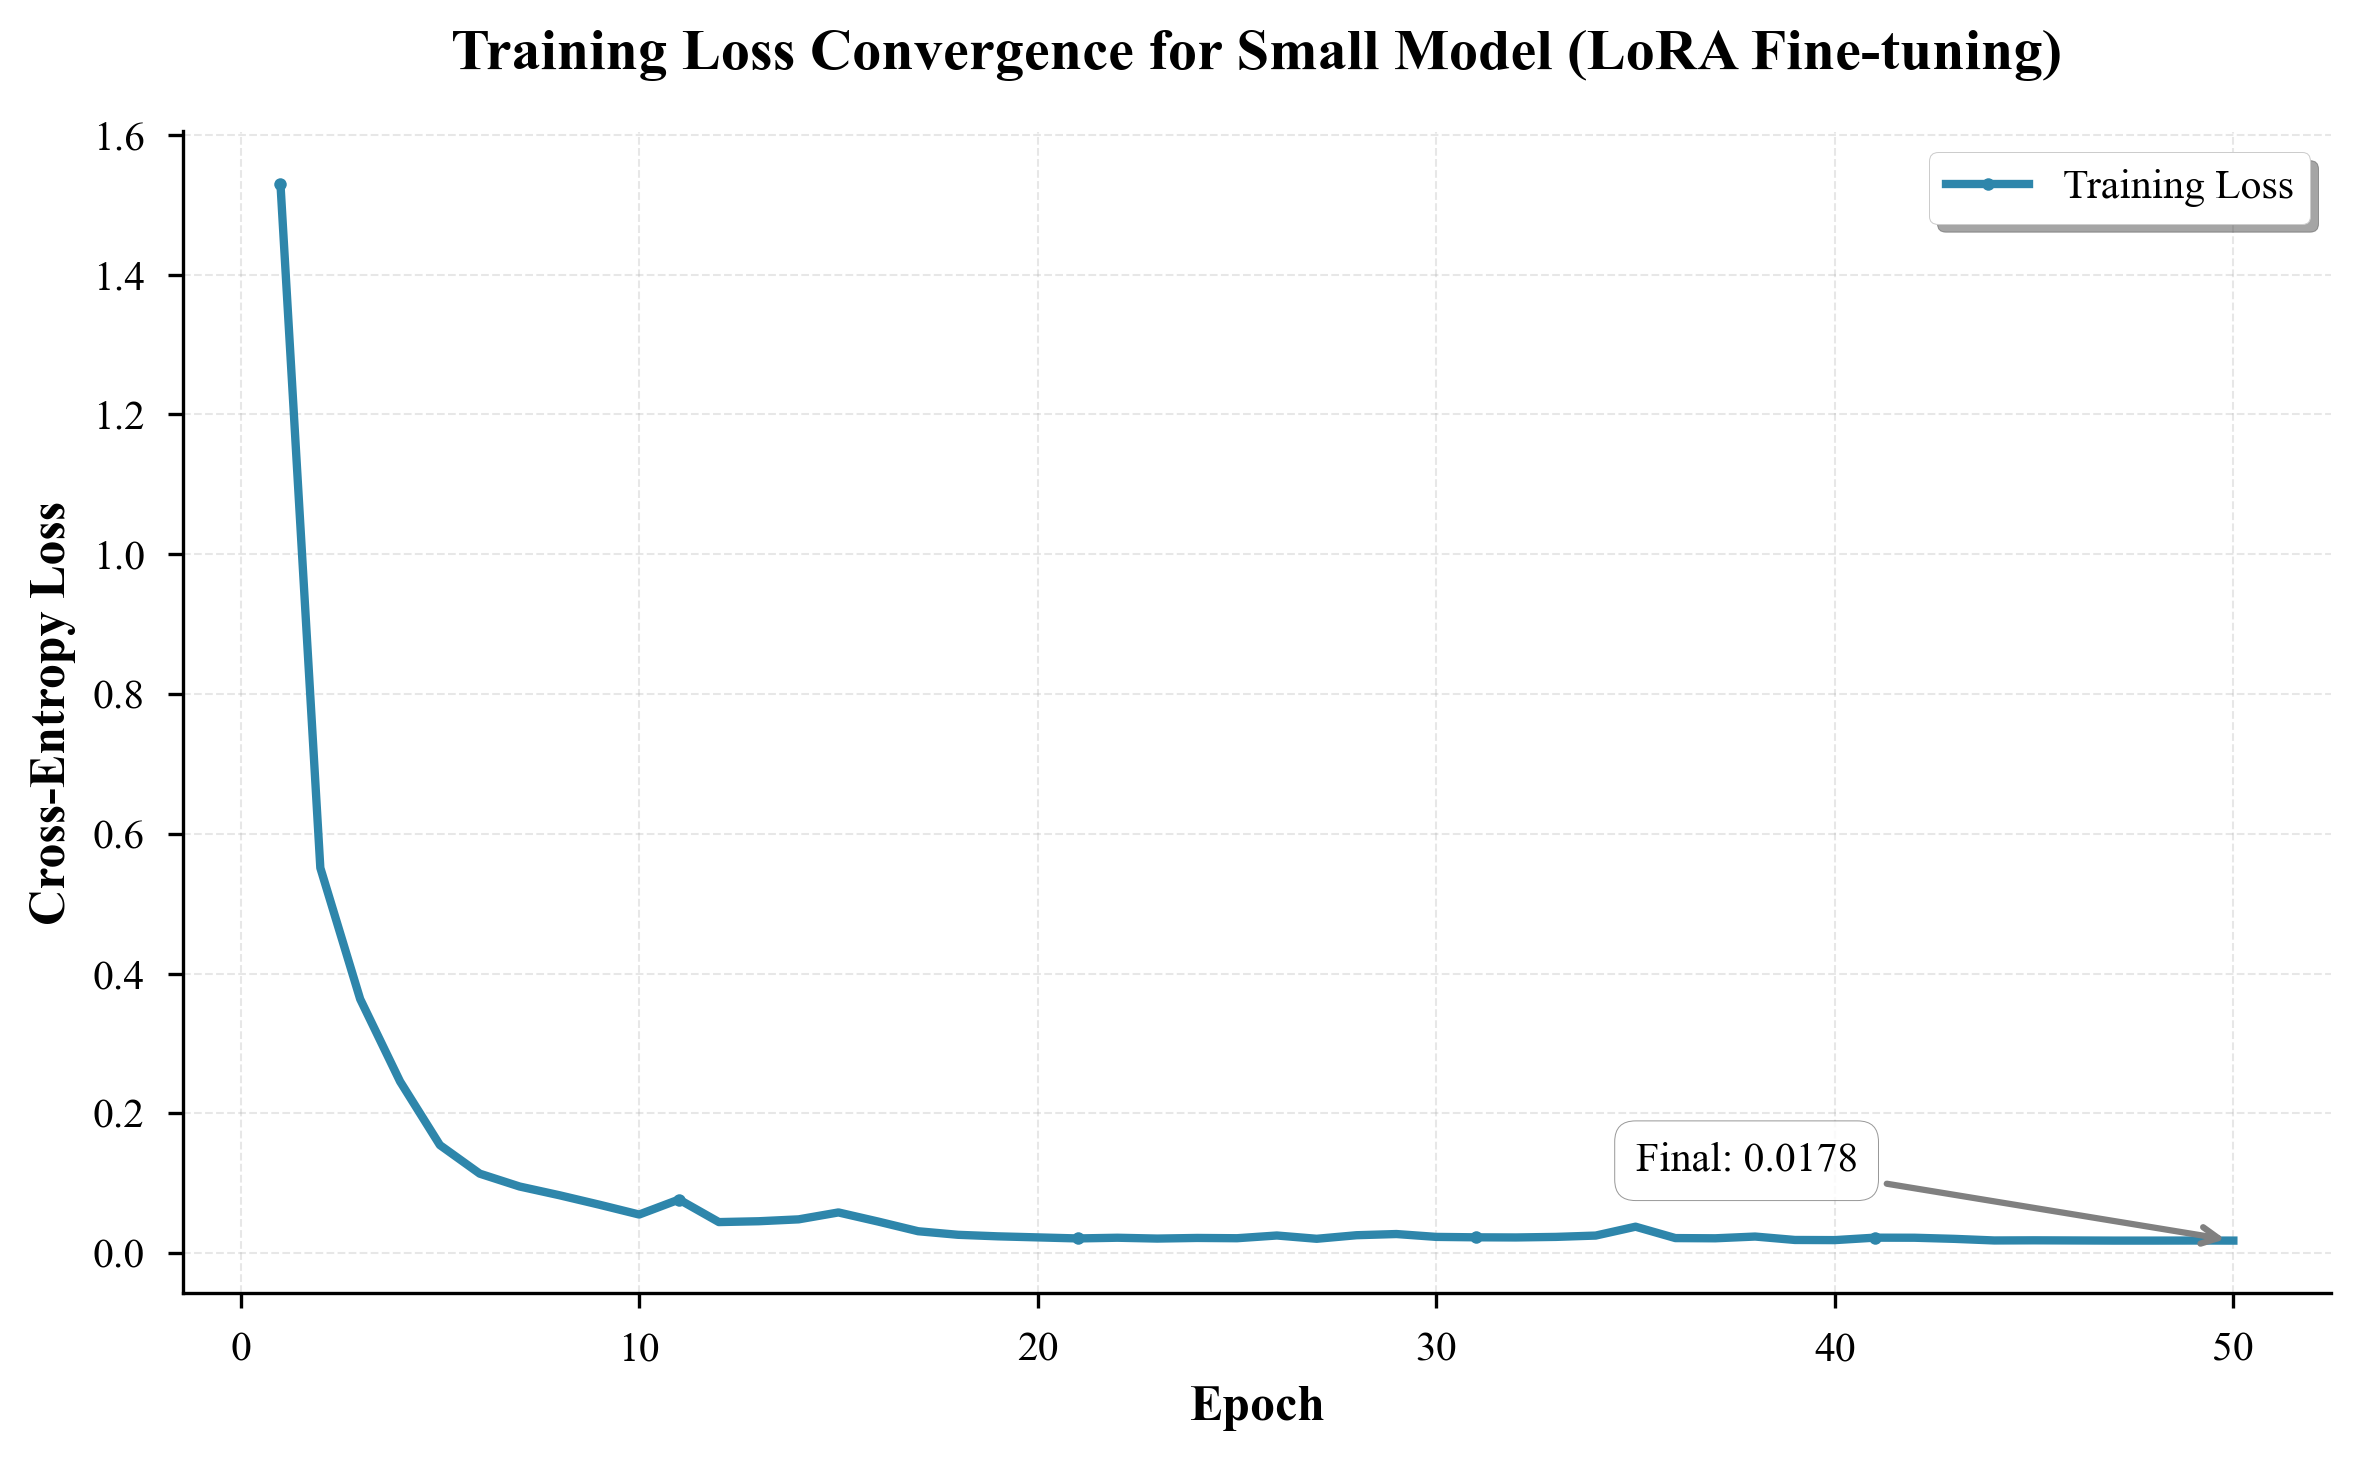

Initial Loss: 1.5294
Final Loss: 0.0178
Loss Reduction: 1.5116 (98.8%)


In [4]:
tl_df = pd.read_csv(f"{PROJECT_PATH}/results/training_loss.csv")
tl_df = tl_df[:50]


import matplotlib.pyplot as plt
import matplotlib as mpl

# Set publication-quality style
plt.style.use('seaborn-v0_8-paper')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.size'] = 11
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.titlesize'] = 14

# Create figure with higher DPI for better quality
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

# Plot with customization
ax.plot(tl_df['epoch'], tl_df['loss'], 
        linewidth=2, 
        color='#2E86AB',  # Professional blue
        marker='o', 
        markersize=3,
        markevery=10,  # Show marker every 10 points
        label='Training Loss')

# Styling
ax.set_title('Training Loss Convergence for Small Model (LoRA Fine-tuning)', 
             fontweight='bold', pad=15)
ax.set_xlabel('Epoch', fontweight='bold')
ax.set_ylabel('Cross-Entropy Loss', fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right', frameon=True, shadow=True)

# Add annotation for final loss
final_epoch = tl_df['epoch'].iloc[-1]
final_loss = tl_df['loss'].iloc[-1]
ax.annotate(f'Final: {final_loss:.4f}', 
            xy=(final_epoch, final_loss),
            xytext=(final_epoch-15, final_loss+0.1),
            arrowprops=dict(arrowstyle='->', color='gray', lw=1.5),
            fontsize=10,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.8))

plt.tight_layout()
plt.savefig(f"{PROJECT_PATH}/results/training_loss_curve.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"Initial Loss: {tl_df['loss'].iloc[0]:.4f}")
print(f"Final Loss: {tl_df['loss'].iloc[-1]:.4f}")
print(f"Loss Reduction: {(tl_df['loss'].iloc[0] - tl_df['loss'].iloc[-1]):.4f} ({((tl_df['loss'].iloc[0] - tl_df['loss'].iloc[-1]) / tl_df['loss'].iloc[0] * 100):.1f}%)")